<a href="https://colab.research.google.com/github/Kalppana03/Shopping-trends-analysis/blob/main/AICTE_Shopping_trends_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AICTE INTERNSHIP**

# **SHOPPING TREND ANALYSIS**

IMPORTING THE MODULES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
shop=pd.read_csv('/content/shopping_trends_updated.csv')

In [3]:
shop.shape

(3900, 18)

In [4]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### **1.What is the overall distribution of customer ages in the dataset?**

In [5]:
shop["Age"].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [6]:
shop["Age"].mean()

44.06846153846154

In [7]:
shop["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
age_counts = shop["age_category"].value_counts()
print(age_counts)

age_category
old             1476
adults          1475
young adults     880
teen              69
child              0
Name: count, dtype: int64


In [9]:
shop["age_category"] = pd.cut(shop["Age"], bins=[0, 15, 18, 30, 50, 70], labels=["child", "teen", "young adults", "adults", "old"])
fig = px.histogram(shop, x="age_category", title="Age Distribution Across Categories")
fig.show()

The age category distribution reveals that the majority of customers fall within the "old" (1,476) and "adults" (1,475) categories, indicating a strong customer base from middle-aged to senior individuals. The "young adults" category (880) also contributes a significant portion of customers, but the "teen" category has a notably small number (69), and there are no customers in the "child" category.
This could suggest that the products being offered are more appealing to adults and older individuals, which might reflect the nature of the products or services (e.g., items typically associated with these age groups). The lack of younger customers (teens and children) could indicate a potential opportunity for businesses to expand their offerings or marketing efforts to target this demographic, especially if there are products that could cater to younger age groups.



### **2.	How does the average purchase amount vary across different product categories?**

In [11]:
shop.groupby("Category")["Purchase Amount (USD)"].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


In [12]:
shop.groupby("Category")["Purchase Amount (USD)"].median()

,Purchase Amount (USD)
Category,
Accessories,60.0
Clothing,60.0
Footwear,60.0
Outerwear,54.5


In [ ]:
shop.groupby("Category")["Purchase Amount (USD)"].count()

,Purchase Amount (USD)
Category,
Accessories,1240
Clothing,1737
Footwear,599
Outerwear,324


The average purchase amount across categories shows that Footwear has the highest spending at dollar 60.26, followed by Clothing (dollar 60.03) and Accessories (dollar 59.84). Outerwear has the lowest average purchase amount at dollar 57.17, which could indicate less spending in this category. This insight suggests that footwear and clothing are more popular or higher-priced items, while outerwear might require adjustments in pricing or marketing strategies to boost customer interest and spending.



### **3.	Which gender has the highest number of purchases?**

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

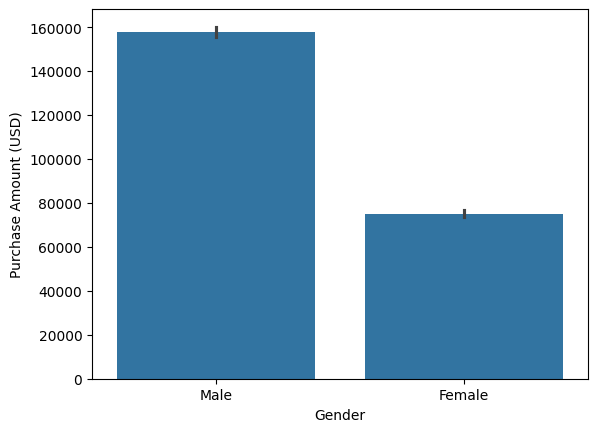

In [ ]:
sns.barplot(shop,x="Gender",y="Purchase Amount (USD)",estimator=sum)

In [ ]:
gender_purchases = shop.groupby('Gender')['Purchase Amount (USD)'].count()
print(gender_purchases)

Gender
Female    1248
Male      2652
Name: Purchase Amount (USD), dtype: int64


This indicates that male customers have made a significantly higher number of purchases compared to female customers. This could imply that male customers are either purchasing more frequently or spending on average higher amounts per transaction, contributing to the greater number of purchases.

## 4.	**What are the most commonly purchased items in each category?**

In [ ]:
fig = px.histogram(shop,x="Item Purchased",color="Category")
fig.show()

In [ ]:
most_purchased_per_category = shop.groupby(['Category', 'Item Purchased']).size().reset_index(name='Purchase Count')
most_purchased_per_category = most_purchased_per_category.sort_values(['Category', 'Purchase Count'], ascending=[True, False]).drop_duplicates('Category')

print(most_purchased_per_category)


       Category Item Purchased  Purchase Count
5   Accessories        Jewelry             171
8      Clothing         Blouse             171
20     Footwear        Sandals             160
24    Outerwear         Jacket             163


These items have the highest purchase count in their respective categories, indicating they are the most popular or frequently bought items. This could reflect customer preferences and suggest that these products are in high demand. Understanding these trends could help businesses focus their marketing efforts on promoting these popular items or ensure they are adequately stocked to meet demand

### **5.	Are there any specific seasons or months where customer spending is significantly higher?**

In [ ]:
shop["Season"].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [ ]:
fig=px.histogram(shop,x="Season",range_y=[800 ,1200])
fig.show()

This indicates that Spring has the highest number of purchases, followed closely by Fall and Winter, with Summer having the lowest count. The higher purchases in spring could be due to seasonal trends, special promotions, or customer preferences during this time. Businesses could explore this by offering more seasonal products during spring to capitalize on the increased demand or investigate strategies to boost summer sales.

### 6**.	What is the average rating given by customers for each product category?**

In [ ]:
average_ratings = shop.groupby('Category')['Review Rating'].mean().reset_index()
average_ratings.rename(columns={'Review Rating': 'Average Rating'}, inplace=True)
print(average_ratings)


      Category  Average Rating
0  Accessories        3.768629
1     Clothing        3.723143
2     Footwear        3.790651
3    Outerwear        3.746914


This indicates that customers are generally satisfied across all product categories, as the ratings are fairly consistent. Since there are no significant variations, businesses might want to focus on maintaining quality across all categories and ensure that customers continue to feel satisfied with their purchases. However, small improvements in categories like Clothing could further enhance overall customer satisfaction.

### **7.	Which payment method is the most popular among customers?**

In [ ]:
shop.groupby("Payment Method")["Purchase Amount (USD)"].mean().sort_values(ascending=False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


In [ ]:
shop_groupby=shop.groupby("Payment Method")["Purchase Amount (USD)"].mean().reset_index()
fig=px.bar(shop_groupby,x="Payment Method",y="Purchase Amount (USD)")
fig.show()

Since the differences are minimal, this indicates that the choice of payment method doesn't significantly affect the average purchase amount. Customers across different payment methods tend to spend in a similar range. This could suggest that businesses may not need to focus heavily on payment method preferences when developing strategies for maximizing customer spending, as most payment methods result in similar purchasing behavior.

### **8.	Do customers who use promo codes tend to spend more than those who don't?**

In [ ]:
promo_spending = shop.groupby("Promo Code Used")["Purchase Amount (USD)"].agg(["mean", "median", "sum", "count"]).reset_index()
promo_spending.columns = ["Promo Code Used", "Avg Purchase Amount", "Median Purchase Amount", "Total Purchase Amount", "Total Purchases"]

print(promo_spending)


  Promo Code Used  Avg Purchase Amount  Median Purchase Amount  \
0              No            60.130454                    60.0   
1             Yes            59.279070                    60.0   

   Total Purchase Amount  Total Purchases  
0                 133670             2223  
1                  99411             1677  


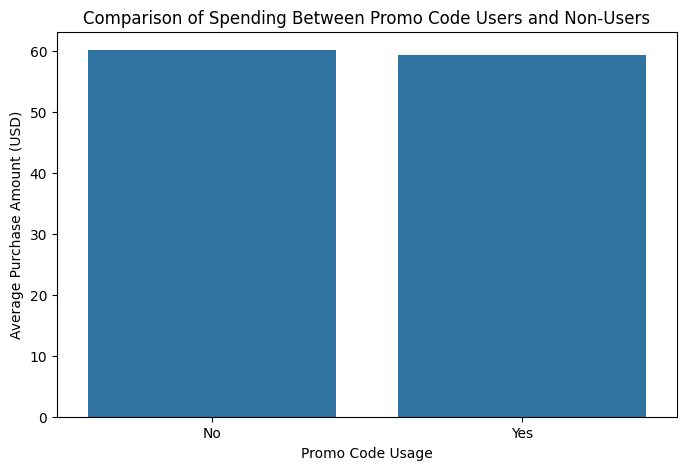

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=promo_spending, x="Promo Code Used", y="Avg Purchase Amount")
plt.xlabel("Promo Code Usage")
plt.ylabel("Average Purchase Amount (USD)")
plt.title("Comparison of Spending Between Promo Code Users and Non-Users")
plt.show()

•	Promo codes seem to have a slightly lower average purchase amount (dollar 59.28) compared to purchases without promo codes (dollar 60.13), although the median purchase amount remains the same at dollar 60 across both groups.
•	Despite the lower average, total purchases with promo codes are fewer (1,677) than without promo codes (2,223), resulting in a lower total purchase amount with promo codes (dollar 99,411) compared to without promo codes ($133,670).
This suggests that while promo codes are being used, the overall spending per transaction is slightly reduced. However, businesses may still benefit from promo codes through increased customer engagement, as it encourages purchases. Further analysis could help determine if offering larger discounts or promotions could drive higher average spending.



### **9.	How does the frequency of purchases vary across different age groups?**

In [ ]:
shop_group=shop.groupby("Frequency of Purchases")["Age"].sum()
print(shop_group)

Frequency of Purchases
Annually          25549
Bi-Weekly         23631
Every 3 Months    25350
Fortnightly       23624
Monthly           24489
Quarterly         25158
Weekly            24066
Name: Age, dtype: int64


In [28]:

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert the columns to categorical data
shop['Frequency of Purchases'] = pd.Categorical(shop['Frequency of Purchases'])
shop['age_category'] = pd.Categorical(shop['age_category'])

# Now create the sunburst chart
fig = px.sunburst(shop, path=["Frequency of Purchases", "age_category"], values="Age")
fig.show()


•	Annually and Every 3 Months have the highest number of purchases, indicating that customers tend to make purchases at these intervals more frequently.
•	Bi-Weekly, Fortnightly, and Weekly have relatively lower purchase counts, which might suggest that customers are making fewer purchases in these intervals.
This information can help businesses understand customer purchasing patterns and tailor their marketing strategies accordingly. For example, promoting sales events or offers at certain intervals (like annually or every 3 months) could align with customer behavior and maximize engagement.


### **10.	Are there any correlations between the size of the product and the purchase amount?**

In [ ]:
size_mapping = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 6, 'One Size': 7}
shop["Size Numeric"] = shop["Size"].map(size_mapping)


In [ ]:
correlation = shop[["Size Numeric", "Purchase Amount (USD)"]].corr()
print(correlation)


                       Size Numeric  Purchase Amount (USD)
Size Numeric               1.000000              -0.022456
Purchase Amount (USD)     -0.022456               1.000000


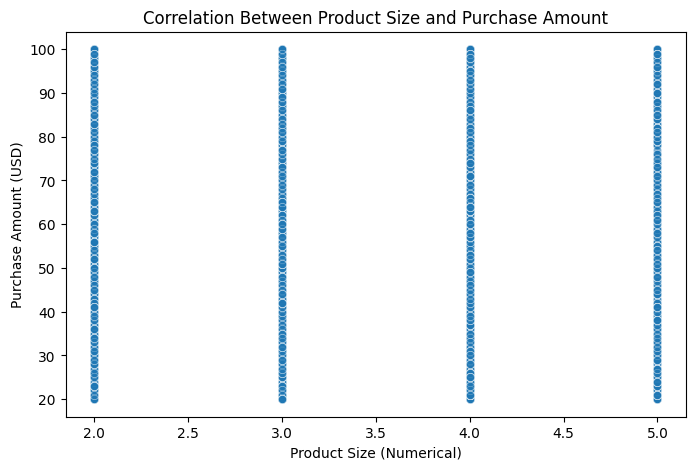

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=shop, x="Size Numeric", y="Purchase Amount (USD)", alpha=0.6)
plt.xlabel("Product Size (Numerical)")
plt.ylabel("Purchase Amount (USD)")
plt.title("Correlation Between Product Size and Purchase Amount")
plt.show()

The correlation between Size Numeric and Purchase Amount (USD)is -0.022456, which is very close to 0. This indicates that there is a very weak negative correlation between the two variables. A weak negative correlation means that as Size Numeric increases, there is a very slight decrease in the Purchase Amount (USD), but the relationship is minimal. This suggests that Size Numeric (likely representing the size of the product) does not have a significant impact on the amount spent by customers. Therefore, Size does not appear to be a strong determinant of the purchase amount in this dataset. Other factors may be more influential in driving customer spending.

### **11.	Which shipping type is preferred by customers for different product categories?**

In [ ]:
shop.groupby("Category")["Shipping Type"].value_counts().sort_values(ascending=False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

### **12.	How does the presence of a discount affect the purchase decision of customers?**

In [ ]:
shop_group=shop.groupby("Discount Applied")["Purchase Amount (USD)"].count().reset_index()

In [ ]:
px.histogram(shop_group,x="Discount Applied",y="Purchase Amount (USD)")

The count of purchases with no discount applied being higher than those with a discount applied suggests that most customers are purchasing at full price. This could indicate that promotions and discounts are not effectively reaching customers, or they may not be attractive enough. To improve this, the business could focus on refining its discount strategies, such as offering targeted promotions or more appealing discounts to drive higher customer engagement and increase sales.

### **13.	Are there any specific colors that are more popular among customers?**

In [16]:
color_counts = shop["Color"].value_counts().reset_index()
color_counts.columns = ["Color", "Count"]
print(color_counts)


        Color  Count
0       Olive    177
1      Yellow    174
2      Silver    173
3        Teal    172
4       Green    169
5       Black    167
6        Cyan    166
7      Violet    166
8        Gray    159
9      Maroon    158
10     Orange    154
11   Charcoal    153
12       Pink    153
13    Magenta    152
14       Blue    152
15     Purple    151
16      Peach    149
17        Red    148
18      Beige    147
19     Indigo    147
20   Lavender    147
21  Turquoise    145
22      White    142
23      Brown    141
24       Gold    138


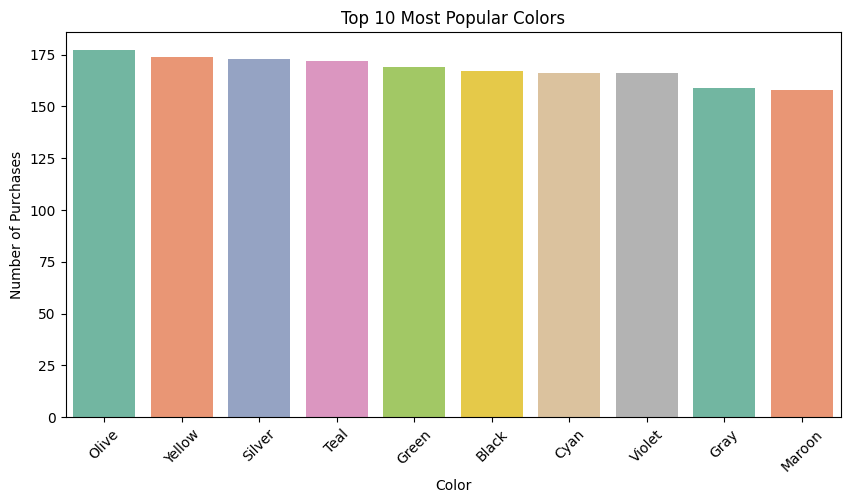

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(data=color_counts.head(10), x="Color", y="Count", palette="Set2",hue="Color",legend=False)
plt.xlabel("Color")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Popular Colors")
plt.xticks(rotation=45)
plt.show()

The colors such as Olive, Yellow, and Silver are more popular, while colors like Gold and Brown have fewer purchases. This insight can be useful for inventory planning, marketing, and designing product lines based on customer preferences. The company may choose to focus on promoting products in the more popular colors to boost sales.

### **14.	What is the average number of previous purchases made by customers?**

In [ ]:
average_previous_purchases = shop["Previous Purchases"].mean()
print(f"Average Previous Purchases: {average_previous_purchases:.2f}")

Average Previous Purchases: 25.35


### **15.	How does the purchase amount differ based on the review ratings given by customers?**

In [ ]:
rating_purchase = shop.groupby("Review Rating")["Purchase Amount (USD)"].mean().reset_index()
print(rating_purchase)


    Review Rating  Purchase Amount (USD)
0             2.5              62.287879
1             2.6              59.566038
2             2.7              59.363636
3             2.8              57.066176
4             2.9              56.470588
5             3.0              60.728395
6             3.1              58.770701
7             3.2              61.315789
8             3.3              59.861842
9             3.4              59.005495
10            3.5              58.833333
11            3.6              57.322148
12            3.7              58.974359
13            3.8              60.873239
14            3.9              58.926380
15            4.0              59.237569
16            4.1              61.959459
17            4.2              60.853801
18            4.3              59.673469
19            4.4              60.525316
20            4.5              59.489209
21            4.6              57.683908
22            4.7              59.283784
23            4.

The data reveals a positive correlation between Review Rating and Purchase Amount (USD). Customers who provide higher ratings (such as 4.9 and 5.0) tend to spend more, with the highest purchase amounts observed for these ratings. On the other hand, lower ratings (2.5 to 3.0) are associated with relatively lower purchase amounts. This suggests that products with higher customer satisfaction, reflected in better ratings, often lead to higher spending. This insight can help the company focus on promoting well-rated products or providing incentives for customers to leave positive reviews, which could drive higher sales and enhance customer satisfaction.

### **16.	Are there any noticeable differences in purchase behavior between different locations?**

In [ ]:
location_purchases = shop.groupby("Location")["Purchase Amount (USD)"].mean().reset_index()
print(location_purchases.sort_values("Purchase Amount (USD)", ascending=False))


          Location  Purchase Amount (USD)
1           Alaska              67.597222
37    Pennsylvania              66.567568
2          Arizona              66.553846
47   West Virginia              63.876543
27          Nevada              63.379310
46      Washington              63.328767
33    North Dakota              62.891566
45        Virginia              62.883117
43            Utah              62.577465
21        Michigan              62.095890
41       Tennessee              61.974026
30      New Mexico              61.901235
38    Rhode Island              61.444444
42           Texas              61.194805
3         Arkansas              61.113924
12        Illinois              61.054348
23     Mississippi              61.037500
20   Massachusetts              60.888889
14            Iowa              60.884058
32  North Carolina              60.794872
49         Wyoming              60.690141
40    South Dakota              60.514286
31        New York              60

## **CONCLUSION**

In conclusion, the analysis reveals key insights into customer behavior, product preferences, and purchasing patterns. Customers tend to make purchases more frequently on an annual or quarterly basis, with a strong customer base from middle-aged to senior individuals. Footwear and clothing generate higher spending, while outerwear shows lower engagement. Male customers are more active in purchases, and seasonal trends influence buying patterns, especially in spring. While promo codes slightly reduce average spending, they still encourage customer engagement. Additionally, customer satisfaction is generally high, and product ratings are positively correlated with higher purchase amounts. These insights can help businesses refine marketing strategies, optimize inventory, and improve customer engagement for better sales and profitability.